# Prediction tasks using Node2vec embeddings

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Importing facebook network data

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


(0.0, 1.0, 0.0, 1.0)

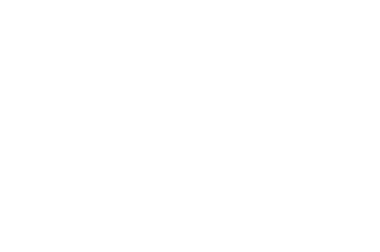

In [2]:
G = nx.read_edgelist('graph/facebook_combined.txt', create_using=nx.Graph(), nodetype=int)
print(nx.info(G))
sp = nx.spring_layout(G)
plt.axis('off')

# Importing embeddings for network node 0

In [68]:
fb_df = pd.read_csv('emb/fb30d.emd', header = None, delim_whitespace = True, index_col = 0)
fb_df.index.names = ['node_id']
# Removing nodes not in survey node 0's subgraph
fb_df = fb_df.loc[fb_df.index <= 347].copy()
fb_df = fb_df.loc[fb_df.index != 0]
fb_df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
node_id,,,,,,,,,,,,,,,,,,,,,
107,-0.129022,0.379533,0.916346,0.330564,0.129653,-0.030945,-0.080650,-0.592688,0.818317,0.148269,...,-0.001122,0.455251,-0.222626,-0.213665,0.212288,0.103447,0.061406,-0.540247,-0.050915,-1.135414
56,-0.484807,-0.075336,0.385342,-0.608107,-0.245066,-1.056025,-0.480105,-0.859172,0.397652,0.010986,...,-0.009324,0.327533,-1.051750,0.643337,-0.664279,-0.834740,-0.185783,-1.539669,-0.854167,-0.513840
67,-0.460825,-0.051119,0.285416,-0.555010,-0.260658,-1.188803,-0.608198,-0.754791,0.552240,-0.012899,...,-0.021724,0.221721,-0.982903,0.807928,-0.731788,-0.825362,0.032155,-1.561961,-0.697621,-0.491282
271,-0.399528,-0.051249,0.358983,-0.427480,-0.110222,-1.144385,-0.508370,-0.765290,0.467112,-0.080227,...,0.136617,0.260365,-1.108146,0.686487,-0.618584,-0.763117,-0.135321,-1.512562,-0.856230,-0.714884
322,-0.617746,-0.098957,0.054265,-0.369388,-0.332890,-0.941614,-0.649589,-0.546856,0.527521,0.054833,...,-0.132929,0.256725,-0.837728,0.570933,-0.763028,-0.847193,0.160799,-1.726033,-0.853907,-0.484769


# Feature prediction

# Importing feature labels for network node 0

In [69]:
feat = pd.read_csv('/Users/armaanvaradaraj/Downloads/facebook/0.feat', header = None, delim_whitespace = True, index_col = 0)
feat.head()

,1,2,3,4,5,6,7,8,9,10,...,215,216,217,218,219,220,221,222,223,224
0,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model #1 - Using only embeddings to predict hometown feature

In [70]:
X = fb_df.loc[:, :]
y = feat[78]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [71]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.70
             precision    recall  f1-score   support

          0       0.71      0.95      0.81        73
          1       0.50      0.12      0.20        32

avg / total       0.65      0.70      0.63       105



In [72]:
np.mean(y)

0.3746397694524496

# Model #2 - Combination of embeddings and features

In [73]:
feat = feat.loc[:, feat.columns != 78]

In [74]:
merged_df = fb_df.merge(feat, left_on = 'node_id', right_index = True, how = 'outer')
merged_df.head()

,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,...,215,216,217,218,219,220,221,222,223,224
node_id,,,,,,,,,,,,,,,,,,,,,
107,-0.129022,0.379533,0.916346,0.330564,0.129653,-0.030945,-0.080650,-0.592688,0.818317,0.148269,...,0,0,0,0,0,0,0,0,0,0
56,-0.484807,-0.075336,0.385342,-0.608107,-0.245066,-1.056025,-0.480105,-0.859172,0.397652,0.010986,...,0,0,1,0,0,0,0,0,0,0
67,-0.460825,-0.051119,0.285416,-0.555010,-0.260658,-1.188803,-0.608198,-0.754791,0.552240,-0.012899,...,1,0,1,0,0,1,0,0,0,0
271,-0.399528,-0.051249,0.358983,-0.427480,-0.110222,-1.144385,-0.508370,-0.765290,0.467112,-0.080227,...,0,0,0,1,0,0,0,0,0,0
322,-0.617746,-0.098957,0.054265,-0.369388,-0.332890,-0.941614,-0.649589,-0.546856,0.527521,0.054833,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X = merged_df.loc[:, :]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.52
             precision    recall  f1-score   support

          0       0.66      0.64      0.65        73
          1       0.24      0.25      0.24        32

avg / total       0.53      0.52      0.53       105



# Model #3 - Using only features to predict gender feature

In [77]:
X = feat.loc[:,:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.96
             precision    recall  f1-score   support

          0       1.00      0.95      0.97        73
          1       0.89      1.00      0.94        32

avg / total       0.97      0.96      0.96       105



# Attribute prediction - bridges

In [79]:
bridges = list(nx.bridges(G))
bridge_nodes_set = set()
for b in bridges:
    bridge_nodes_set.add(b[0])
    bridge_nodes_set.add(b[1])
fb_df = pd.read_csv('emb/fb30d.emd', header = None, delim_whitespace = True, index_col = 0)
fb_df.head()

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
0,,,,,,,,,,,,,,,,,,,,,
3437,-0.922725,0.453523,0.557015,0.606418,-0.342615,-0.028228,0.532565,0.170559,0.838807,0.731744,...,0.744443,0.905788,-1.354629,-0.184478,-0.502150,0.506890,-0.629649,-0.316707,-0.631797,0.397219
107,-0.129022,0.379533,0.916346,0.330564,0.129653,-0.030945,-0.080650,-0.592688,0.818317,0.148269,...,-0.001122,0.455251,-0.222626,-0.213665,0.212288,0.103447,0.061406,-0.540247,-0.050915,-1.135414
1684,0.066865,-0.037750,1.259948,0.666295,-0.341688,-1.219977,-0.190385,-0.196787,-0.288791,0.449309,...,-0.742452,0.057590,-1.088893,0.953836,0.049338,-0.382992,-0.459109,-0.456535,0.816402,-0.368797
0,-0.749968,-0.112828,0.260796,-0.705716,-0.424839,-0.916108,-0.813395,-1.032195,0.194843,0.524958,...,0.120669,0.190792,-1.367335,0.964169,-0.842256,-0.124717,0.297547,-1.341817,-0.868500,-0.718032
1912,-0.404112,0.657081,-0.494225,-0.222560,-1.027060,-1.392978,0.032025,-0.122509,0.138376,0.424452,...,-0.444784,0.805084,-0.692766,0.104478,0.614683,-0.124108,0.080984,0.014531,0.432420,1.049747


In [80]:
bridge_col = np.zeros(len(fb_df.index))
for i in range(len(fb_df.index)):
    if i in bridge_nodes_set:
        bridge_col[i] = 1
    else:
        bridge_col[i] = 0
bridge_col

array([1., 0., 0., ..., 0., 0., 0.])

In [81]:
fb_df['bridge'] = bridge_col
X = fb_df.loc[:, fb_df.columns != 'bridge']
y = fb_df.loc[:, fb_df.columns == 'bridge']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [82]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [83]:
np.mean(y)

bridge    0.021045
dtype: float64

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.98      1.00      0.99      1186
        1.0       0.00      0.00      0.00        26

avg / total       0.96      0.98      0.97      1212



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
